In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

a = pd.read_csv("/content/sorted_test.csv")
print(a)
print(a.isnull())
a.fillna(0, inplace=True)
print(a.isnull())


         PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0    09gt9UK5  0.210899  0.209221  0.207645  0.208714  0.211972  0.213562   
1    0BVvxJ6a  0.191650  0.184120  0.177070  0.180624  0.192343  0.197502   
2    0KbdgApg  0.083966  0.074740  0.065596  0.069924  0.085145  0.092527   
3    0MnuuduB  0.345962  0.338567  0.331786  0.336948  0.350820  0.356365   
4    0PcIsF9z  0.239019  0.232611  0.226266  0.229921  0.241821  0.247756   
..        ...       ...       ...       ...       ...       ...       ...   
722  zYxNAkht  0.085652  0.079194  0.072675  0.076521  0.088629  0.094268   
723  zaWDBai3  0.368007  0.364070  0.360006  0.362216  0.369548  0.373043   
724  zg3u0Zsx  0.329252  0.326508  0.324420  0.325953  0.330105  0.331389   
725  zlwLfdsS  0.250324  0.245624  0.241077  0.243921  0.252393  0.255845   
726  zmbKzVfl  0.210697  0.203117  0.195845  0.199793  0.212323  0.217769   

     m7486.39  m7484.46  m7482.54  ...      LSTD      LSTN      REF1  \
0  

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

a = pd.read_csv("/content/sorted_test.csv")
y = a['Depth']
x = a.drop(['PIDN'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=85)

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
print("Accuracy Score of SVM:", accuracy_score(y_test, y_pred))


Accuracy Score of SVM: 0.773972602739726


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

a = pd.read_csv("/content/sorted_test.csv")
y = a['Depth']
x = a.drop(['PIDN'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=85)

perceptron_classifier = Perceptron()
perceptron_classifier.fit(x_train, y_train)
y_pred_perceptron = perceptron_classifier.predict(x_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy Score of Perceptron:", accuracy_perceptron)


Accuracy Score of Perceptron: 0.9794520547945206


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

a = pd.read_csv("/content/sorted_test.csv")
y = a['Depth']
x = a.drop(['PIDN'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=85)

logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train, y_train)

y_pred_logistic = logistic_classifier.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy Score of Logistic Regression:", accuracy_logistic)


Accuracy Score of Logistic Regression: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


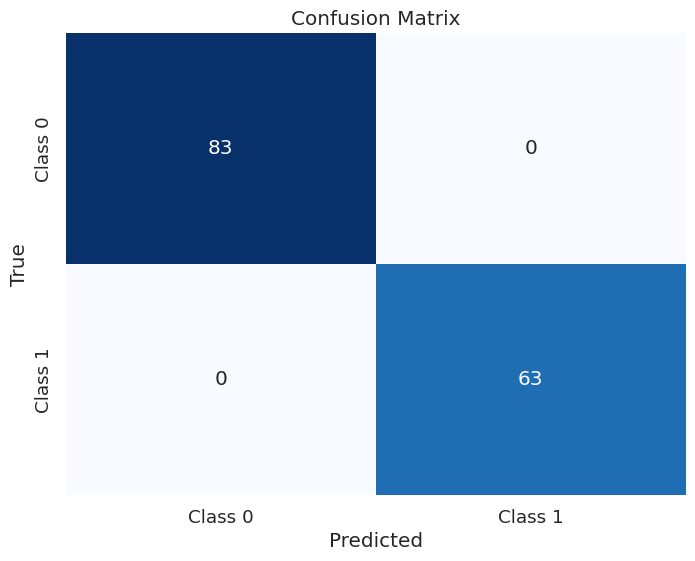

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        63

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined x_train, y_train, x_test, and y_test somewhere in your code
# Split your data into training and testing sets


# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

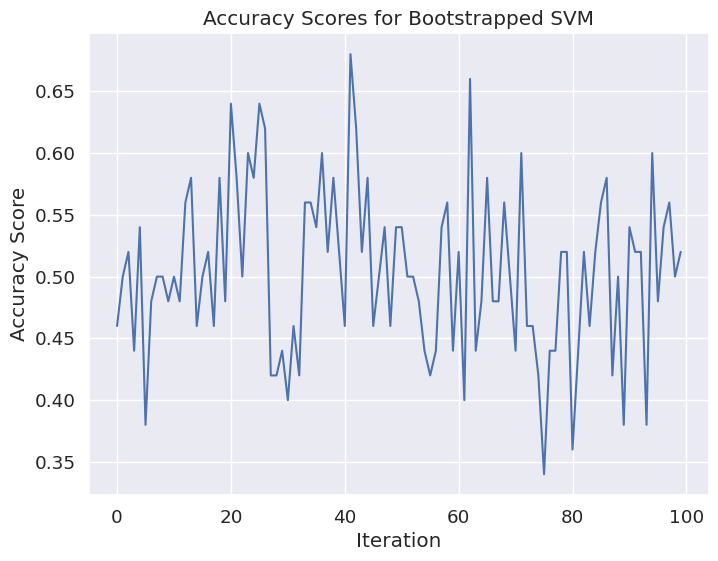

In [17]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an SVM model
model = SVC()

# Fit the SVM model to your test data (x_test, y_test)
model.fit(x_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(x_train, y_train, n_samples=n_bootstrap_samples)

    # Predict using the SVM model
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped SVM")
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        83
           1       0.45      0.48      0.47        63

    accuracy                           0.53       146
   macro avg       0.52      0.52      0.52       146
weighted avg       0.53      0.53      0.53       146



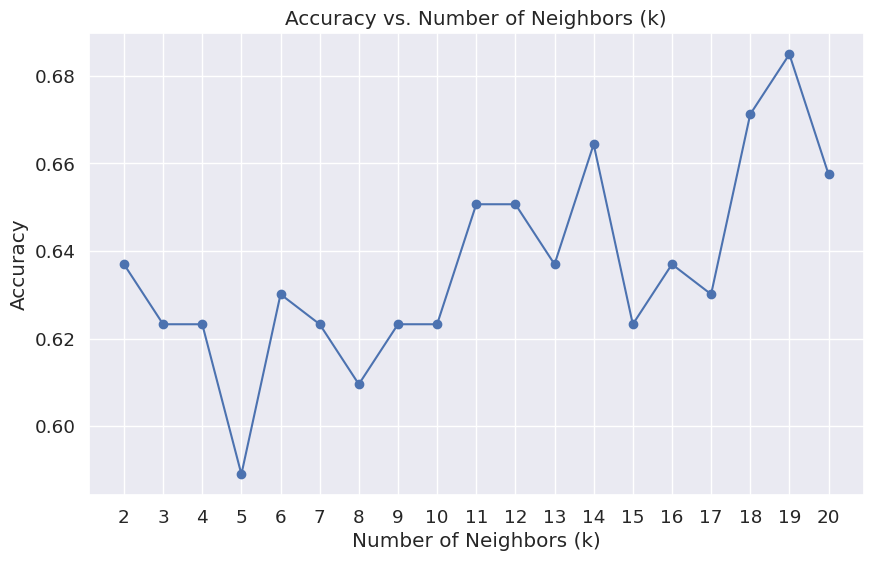

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy values and corresponding 'k' values
k_values = []
accuracy_values = []

# Iterate through different 'k' values from 2 to 20
for k in range(2, 21):
    # Create a k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(x_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy versus 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()

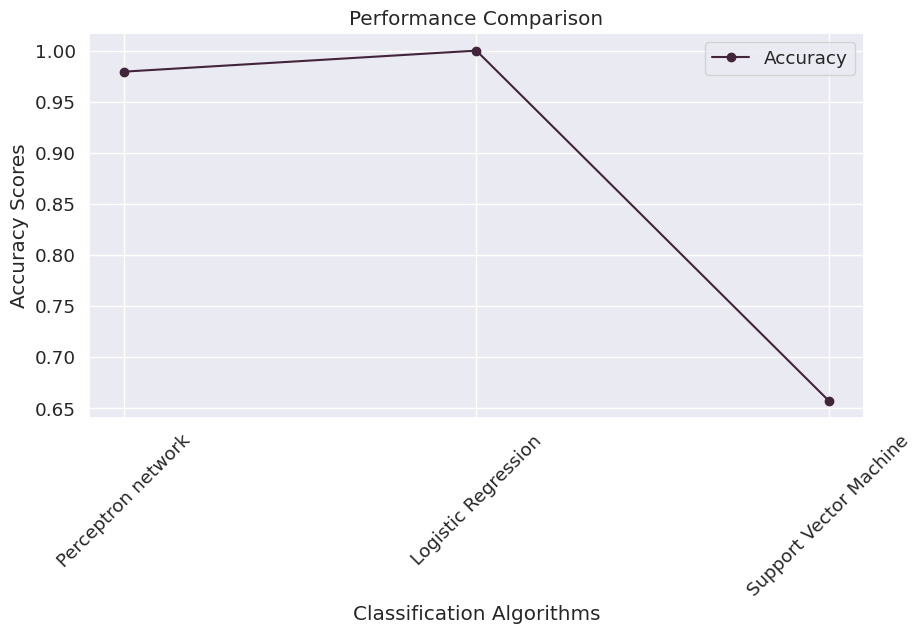

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have trained the logistic regression and SVM models and have the accuracy scores
accuracy_LR = accuracy_score(y_test, y_pred_logistic)
accuracy_SVM = accuracy_score(y_test, y_pred)

algorithm_names = ['Perceptron network', 'Logistic Regression', 'Support Vector Machine']
accuracy_scores = [accuracy_perceptron, accuracy_LR, accuracy_SVM]

# Plotting the scores
plt.figure(figsize=(10, 5))
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label='Accuracy', marker='o', color='#42253B')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


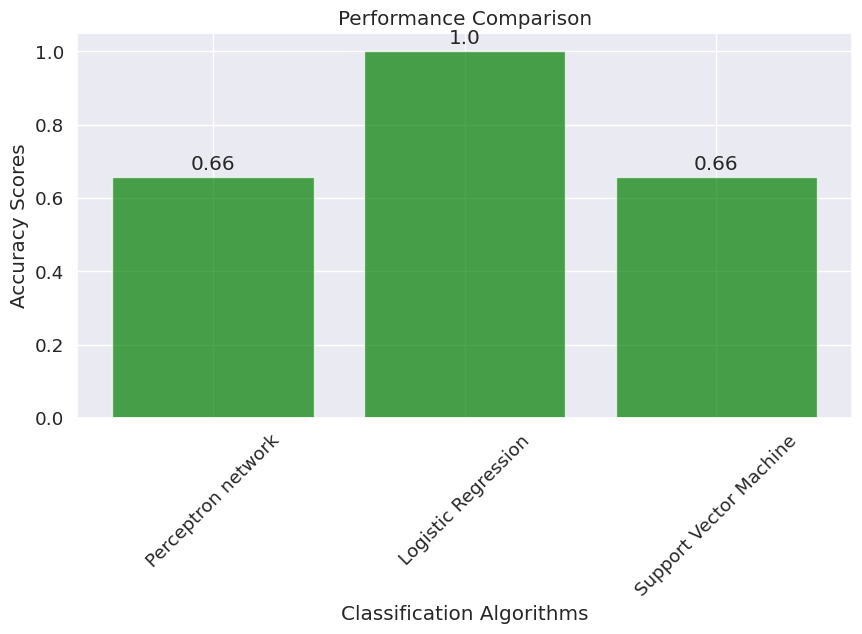

In [22]:
import matplotlib.pyplot as plt

algorithm_names = ['Perceptron network', 'Logistic Regression', 'Support Vector Machine']
accuracy_scores = [accuracy, accuracy_LR, accuracy_SVM]

plt.figure(figsize=(10, 5))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Confusion Matrix : 
 [[67 16]
 [34 29]]


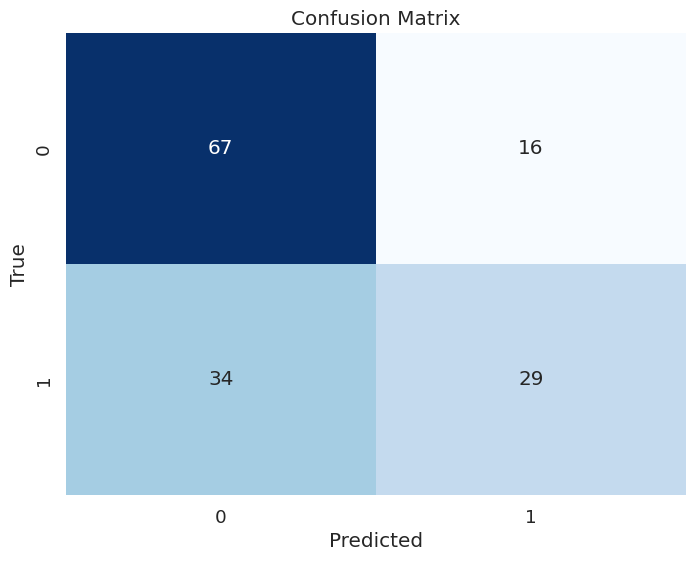

Accuracy: 0.6575342465753424
Precision: 0.6552014105520142
Recall: 0.6575342465753424
F1-score: 0.64574647607703


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)